In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid",color_codes=True)

In [ ]:
### haremos una regresion lineal (marketing) siguiendo a susan lee

In [2]:
url = r"C:\Users\gonza\Downloads\Bank marketing campaigns dataset\bank-additional-full.csv"
data = pd.read_csv(url,sep=";")
data.dropna()
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data["education"] = np.where(data["education"] == "basic.9y","Basic",data["education"])
data["education"] = np.where(data["education"] == "basic.6y","Basic",data["education"])
data["education"] = np.where(data["education"] == "basic.4y","Basic",data["education"])


### EDA

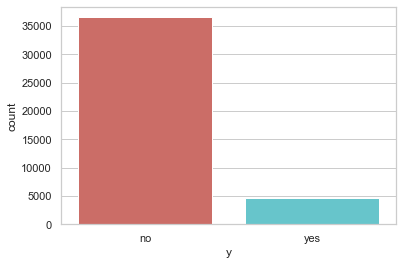

In [4]:
sns.countplot(x="y",data=data,palette="hls")
plt.show()

In [10]:
no = data["y"].value_counts()[0] / len(data) *100
si = data["y"].value_counts()[1] / len(data) *100
print(f"el porcentaje de no subcripcion es:{no}")
print(f"el porcentaje de subcripcion es:{si}")


el porcentaje de no subcripcion es:88.73458288821988
el porcentaje de subcripcion es:11.265417111780131


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [12]:
data.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [14]:
data.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


Text(0, 0.5, &#39;Frecuency of purchase&#39;)

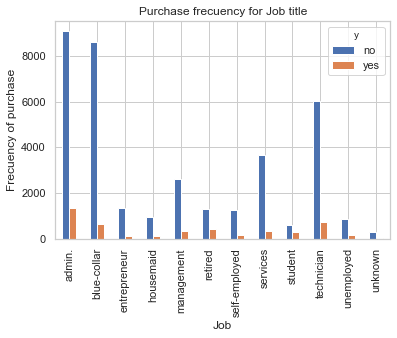

In [15]:
### visualizacion
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind="bar")
plt.title("Purchase frecuency for Job title")
plt.xlabel("Job")
plt.ylabel("Frecuency of purchase")

### pipeline

In [41]:
url = r"C:\Users\gonza\Downloads\BigMart Sales Data\Train.csv"
train_data = pd.read_csv(url)
#check for null values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
# para la numerica usamos la media, y para la categorica la moda
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

Note that in this example I am not going to encode Item_Identifier since it will increase the number of feature to 1500. This feature  can be used in other ways (read here), but to keep the model simple, I will not use this feature here.

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
# Encode the categorical variables
columns = train_data.select_dtypes("object").columns.values.tolist()
columns_cate = [v for v in columns if v != "Item_Identifier" ]

In [45]:
columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [46]:
columns_cate

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [47]:
# create an object of the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown="ignore")
# encode the categorical variables
ce = OHE.fit_transform(train_data[columns_cate]).toarray()
ce

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [48]:
ce_df = pd.DataFrame(ce)

In [49]:
# merge con train_data
train_data = train_data.join(ce_df)
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,31,32,33,34,35,36,37,38,39,40
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [50]:
# podemos quitar las columnas
train_data.drop(columns_cate,inplace=True,axis=1)

In [51]:
#Scale the data:
from sklearn.preprocessing import StandardScaler
# create an object of the standarscaler
scaler = StandardScaler()
# fit with the Item_MRP
scaler.fit(np.array(train_data["Item_MRP"]).reshape(-1,1))
# transforma the data
train_data["Item_MRP"] = scaler.transform(np.array(train_data["Item_MRP"]).reshape(-1,1))



In [54]:
# Model Building
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

def modelos_aprueba(train_X,train_Y,model):
    train_x,test_x,train_y,test_y = train_test_split(train_X,train_Y,test_size=0.25,random_state=0)
    model = model
    model.fit(train_x,train_y)

    predict_train = model.predict(train_x)
    predict_test = model.predict(test_x)

    print("rmse on train data:",mean_squared_error(train_y,predict_train)**(0.5))
    print("rmse on test data:",mean_squared_error(test_y,predict_test)**(0.5))
    





In [55]:
model = LinearRegression()
modelos_aprueba(train_X,train_Y,model)

rmse on train data: 1120.4101706750557
rmse on test data: 1148.7127335923822


In [56]:
model = RandomForestRegressor(max_depth=10)
modelos_aprueba(train_X,train_Y,model)

rmse on train data: 919.3677792996241
rmse on test data: 1149.5161081689832


In [57]:
import statsmodels.api as sm
logic_model = sm.OLS(train_Y,train_X)
result = logic_model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     354.1
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:28:18   Log-Likelihood:                -71987.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8491   BIC:                         1.443e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                  -0.5047      2.915     -0.173      0.863      -6.219       5.209
Item_Visibility            -304.9771    248.751     -1.226      0.220    -792.590     182.636
Item_MRP                    969.1662     12.313     78.712      0.000     945.030     993.302
Outlet_Establishment_Year     0.9906      0.028     35.785      0.000       0.936       1.045
0                           -30.4387     59.462     -0.512      0.609    -146.999      86.122
1                             1.0664     35.433      0.030      0.976     -68.391      70.524
2                            44.9182     37.396      1.201      0.230     -28.388     118.224
3                            47.4534     89.243      0.532      0.595    -127.484     222.390
4                           -60.0995     87.745     -0.685      0.493    -232.101     111.902
5                            -5.6932     45.306     -0.126      0.900     -94.504      83.118
6                            -1.7053     69.070     -0.025      0.980    -137.100     133.689
7                             1.4118    102.622      0.014      0.989    -199.753     202.577
8                            19.2880     45.163      0.427      0.669     -69.243     107.819
9                           -47.3320     44.157     -1.072      0.284    -133.890      39.226
10                          -33.2517     40.300     -0.825      0.409    -112.249      45.746
11                           24.3634     35.068      0.695      0.487     -44.379      93.105
12                           -7.2850     75.027     -0.097      0.923    -154.357     139.787
13                          -16.3844     50.526     -0.324      0.746    -115.428      82.659
14                          -44.8094     40.363     -1.110      0.267    -123.930      34.311
15                           -6.6215     54.667     -0.121      0.904    -113.783     100.540
16                          -26.6863     83.747     -0.319      0.750    -190.851     137.479
17                          178.2044    133.241      1.337      0.181     -82.981     439.390
18                          -17.1450     35.241     -0.487      0.627     -86.226      51.936
19                          -33.3906     53.348     -0.626      0.531    -137.966      71.185
20                           19.9366     88.754      0.225      0.822    -154.043     193.916
21                         -679.7387     25.981    -26.163      0.000    -730.669    -628.809
22                          -10.1472     12.952     -0.783      0.433     -35.535      15.241
23                           12.3194     29.078      0.424      0.672     -44.680      69.319
24                          -57.8517     16.069     -3.600      0.000     -89.352     -26.352
25                         -374.0718     23.453    -15.950      0.000    -4

In [58]:
# select features (we plot the 7 most important features)
train_x,test_x,train_y,test_y = train_test_split(train_X,train_Y,test_size=0.25,random_state=0)
model = RandomForestRegressor(max_depth=10)
model.fit(train_x,train_y)

predict_train = model.predict(train_x)
predict_test = model.predict(test_x)


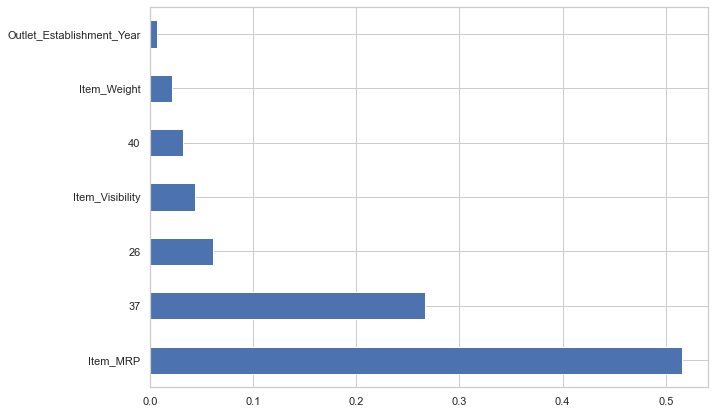

In [59]:
plt.figure(figsize=(10,7))
features = pd.Series(model.feature_importances_,index=train_x.columns)
features.nlargest(7).plot(kind="barh")

In [60]:
# ahora usamos el modelo pero con las features mas importantes
cols_features = list(features.sort_values(ascending=False).index[:7])


In [61]:
model = RandomForestRegressor(max_depth=10)
modelos_aprueba(train_X[cols_features],train_Y,model)

rmse on train data: 915.9289558814286
rmse on test data: 1138.8849330413746


Now, this is amazing! Using only 7 features has given almost the same performance as the previous model where we were using 45 features. Let us identify the final set of features that we need and the preprocessing steps for each of them.


### Ejemplos uso Panda

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

In [2]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\telecom_churn.csv"
df = pd.read_csv(url)
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [3]:
#what is the proportion of churned users in our dataframe?
df["Churn"].mean() * 100

14.491449144914492

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [5]:
#Boolean indexing with one column is also very convenient. The syntax is df[P(df['Name'])], where P is some logical condition that is checked for each element of the Name column. The result of such indexing is the DataFrame consisting only of rows that satisfy the P condition on the Name column.
df[df["Churn"]==1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [6]:
#What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?
df[(df["Churn"]==0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

In [7]:
#If we need the first or the last line of the data frame, we can use the df[:1] or df[-1:] construct:
df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [8]:
# Applying Functions to Cells, Columns and Rows
# To apply functions to each column, use apply():
df.apply(np.max)

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                        True
dtype: object

In [9]:
#The apply method can also be used to apply a function to each row. To do this, specify axis=1. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with W, we can do it like this:
[n for n in df["State"].unique() if n.startswith("N")]

['NJ', 'NY', 'NE', 'NH', 'NC', 'NM', 'NV', 'ND']

In [10]:
# filtrando dataset
df[df["State"].apply(lambda state: state[0] == "N")].head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
25,NE,174,415,No,No,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,False
31,NH,75,510,No,No,0,226.1,105,38.44,201.5,107,17.13,246.2,98,11.08,10.3,5,2.78,1,False


In [11]:
#The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:
d = {"Yes":True,"No":False}
df["International plan"] = df["International plan"].map(d)
df.head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [12]:
#The same thing can be done with the replace method:
df = df.replace({"Voice mail plan": d})
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [13]:
# groupby df.groupby(by=grouping_columns)[columns_to_show].function()
columns_to_show = ['Total day minutes', 'Total eve minutes']
df.groupby("Churn")[columns_to_show].describe(percentiles=[]) 

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
False            2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
True              483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                          
         mean    std   min    50%    max  
Churn                                     
False  199.04  50.29   0.0  199.6  361.8  
True   212.41  51.73  70.9  211.3  363.7

In [14]:
# Let’s do the same thing, but slightly differently by passing a list of functions to agg():
df.groupby("Churn")[columns_to_show].agg([np.max,np.std,np.min,np.mean])

Total day minutes                     Total eve minutes               \
                   amax    std amin    mean              amax    std  amin   
Churn                                                                        
False             315.6  50.18  0.0  175.18             361.8  50.29   0.0   
True              350.8  69.00  0.0  206.91             363.7  51.73  70.9   

               
         mean  
Churn          
False  199.04  
True   212.41

In [15]:
# change false and true to 0 and 1
a = {False:0,True:1}
df["Churn"] = df["Churn"].map(a)
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [16]:
# Summary tables
#Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the crosstab method:
pd.crosstab(index=df["Churn"],columns=df["International plan"],normalize=True)

International plan,False,True
Churn,,
0,0.8,0.06
1,0.1,0.04


This will resemble pivot tables to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the pivot_table method takes the following parameters:

* values – a list of variables to calculate statistics for,
* index – a list of variables to group data by,
* aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

In [17]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
                index="Area code", aggfunc="mean")

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [18]:
# Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.
# For example, if we want to calculate the total number of calls for all users, let's create the total_calls Series and paste it into the DataFrame:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns),column="Total calls",value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [19]:
#It is possible to add a column more easily without creating an intermediate Series instance:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


### First attempt at predicting telecom churn
Let's see how churn rate is related to the International plan feature. We'll do this using a crosstab contingency table and also through visual analysis with Seaborn (however, visual analysis will be covered more thoroughly in the next article).

In [20]:
pd.crosstab(df["Churn"],df["International plan"],margins=True) # con margin tenemos los totales

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [21]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

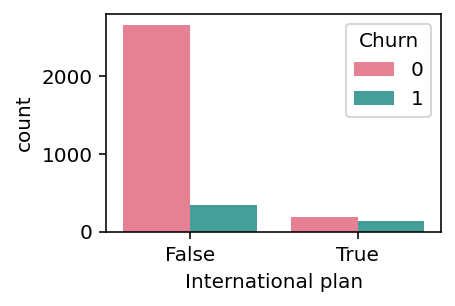

In [22]:
plt.figure(figsize=(3,2))
sns.countplot(x="International plan",hue="Churn",data=df,palette="husl")

In [23]:
#Next, let's look at another important feature – Customer service calls. Let's also make a summary table and a picture.
pd.crosstab(df["Churn"],df["Customer service calls"],margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


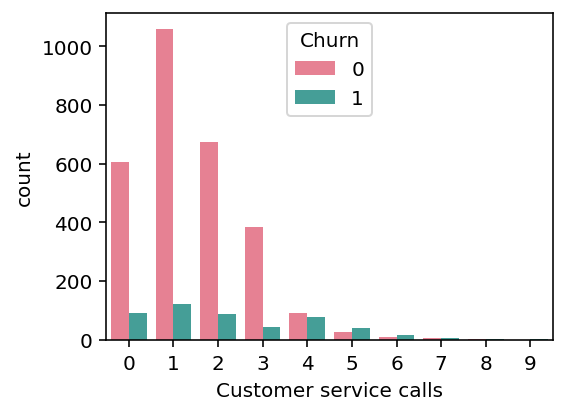

In [24]:
plt.figure(figsize=(4,3))
sns.countplot(x="Customer service calls",hue="Churn",data=df,palette="husl")

### Ejercicio panda mlcourse.ai

In [25]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Adults_Census_dataset\adult.data"
columns = columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url,header=None,names=columns)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [26]:
#1. How many men and women (sex feature) are represented in this dataset?
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [27]:
#2. What is the average age (age feature) of women?
df.groupby("sex")["age"].mean()

sex
 Female    36.86
 Male      39.43
Name: age, dtype: float64

In [28]:
#3. What is the proportion of German citizens (native-country feature)?
df[df['native-country']==" Germany"].count()[0] / len(df)

0.004207487485028101

In [29]:
#4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (salary feature) and those who receive less than 50K per year?
df.groupby(["income"])["age"].agg([np.mean,np.std])

,mean,std
income,,
<=50K,36.78,14.02
>50K,44.25,10.52


In [30]:
#6. Is it true that people who receive more than 50k have at least high school education? (education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)
df[df["income"] ==" >50K"]["education"].unique()

array([' HS-grad', ' Masters', ' Bachelors', ' Some-college',
       ' Assoc-voc', ' Doctorate', ' Prof-school', ' Assoc-acdm',
       ' 7th-8th', ' 12th', ' 10th', ' 11th', ' 9th', ' 5th-6th',
       ' 1st-4th'], dtype=object)

In [31]:
#7. Display statistics of age for each race (race feature) and each gender. Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.
df.groupby(["race","sex"])["age"].describe()

count   mean    std   min   25%   50%    75%  \
race                sex                                                       
 Amer-Indian-Eskimo  Female    119.0  37.12  13.11  17.0  27.0  36.0  46.00   
                     Male      192.0  37.21  12.05  17.0  28.0  35.0  45.00   
 Asian-Pac-Islander  Female    346.0  35.09  12.30  17.0  25.0  33.0  43.75   
                     Male      693.0  39.07  12.88  18.0  29.0  37.0  46.00   
 Black               Female   1555.0  37.85  12.64  17.0  28.0  37.0  46.00   
                     Male     1569.0  37.68  12.88  17.0  27.0  36.0  46.00   
 Other               Female    109.0  31.68  11.63  17.0  23.0  29.0  39.00   
                     Male      162.0  34.65  11.36  17.0  26.0  32.0  42.00   
 White               Female   8642.0  36.81  14.33  17.0  25.0  35.0  46.00   
                     Male    19174.0  39.65  13.44  17.0  29.0  38.0  49.00   

                              max  
race                sex            
 Amer-Indian-Eskimo  Female  80.0  
                     Male    82.0  
 Asian-Pac-Islander  Female  75.0  
                     Male    90.0  
 Black               Female  90.0  
                     Male    90.0  
 Other               Female  74.0  
                     Male    77.0  
 White               Female  90.0  
                     Male    90.0

In [32]:
#9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?
df["hours-per-week"].max()

99

In [33]:
df[df["hours-per-week"] == 99].groupby("income").count().iloc[:,1] / 85

income
 <=50K    0.71
 >50K     0.29
Name: workclass, dtype: float64

In [34]:
#10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?
little = df[df["income"] ==" <50K"]
lot = df[df["income"] ==" >50K"]

In [37]:
lot.groupby('native-country')["hours-per-week"].mean().head(5)

native-country
 ?           45.55
 Cambodia    40.00
 Canada      45.64
 China       38.90
 Columbia    50.00
Name: hours-per-week, dtype: float64

### Visualizacion

In [39]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\telecom_churn.csv"
df = pd.read_csv(url)
df.head(3)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A753319D0>,
      dtype=object)

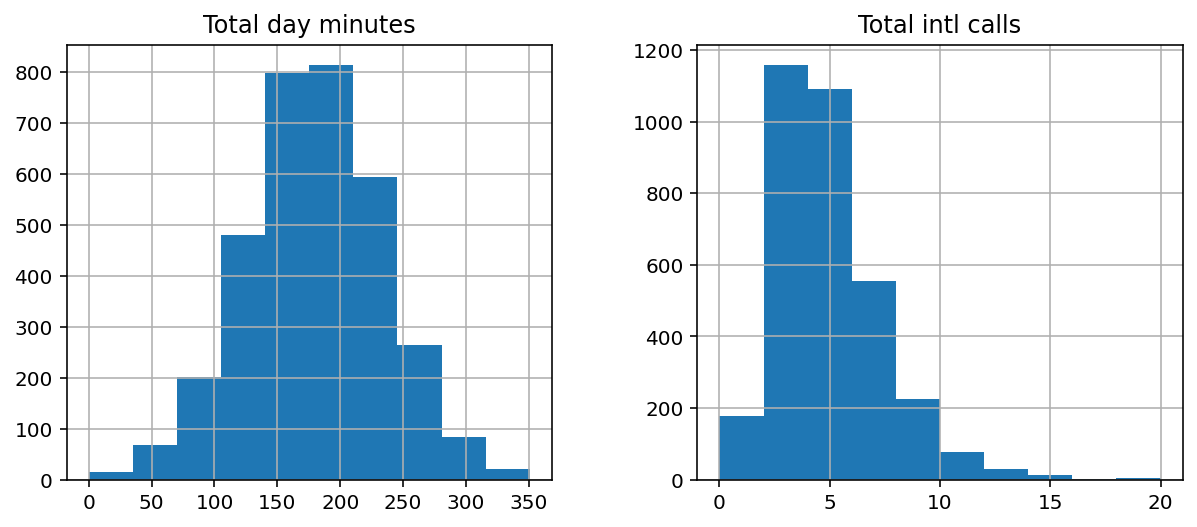

In [40]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10,4 ))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A758A2310>,
      dtype=object)

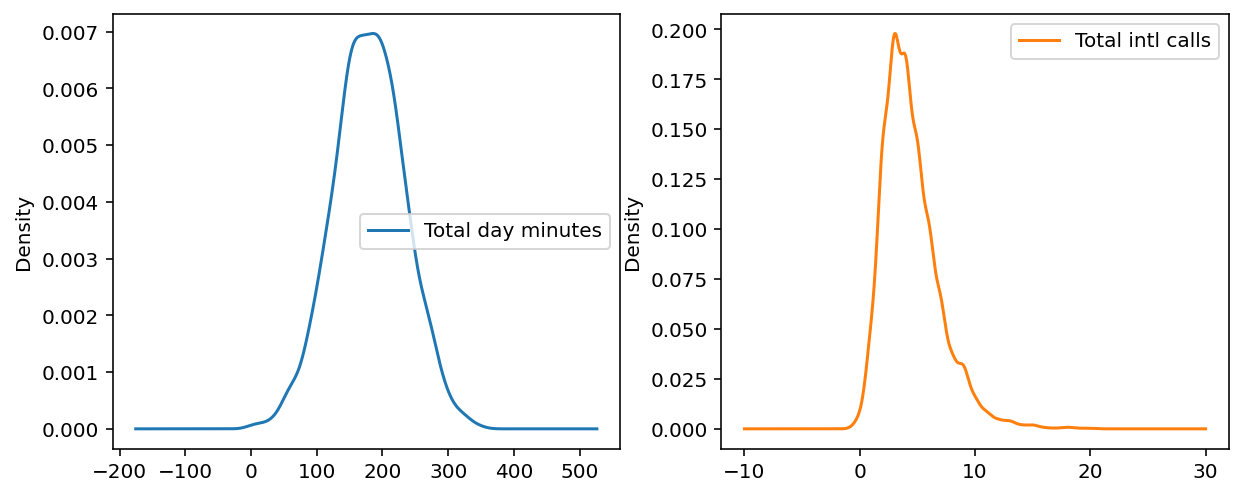

In [43]:
#here is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:
df[features].plot(kind="density",subplots=True,layout=(1,2),
                    sharex=False,figsize=(10,4))

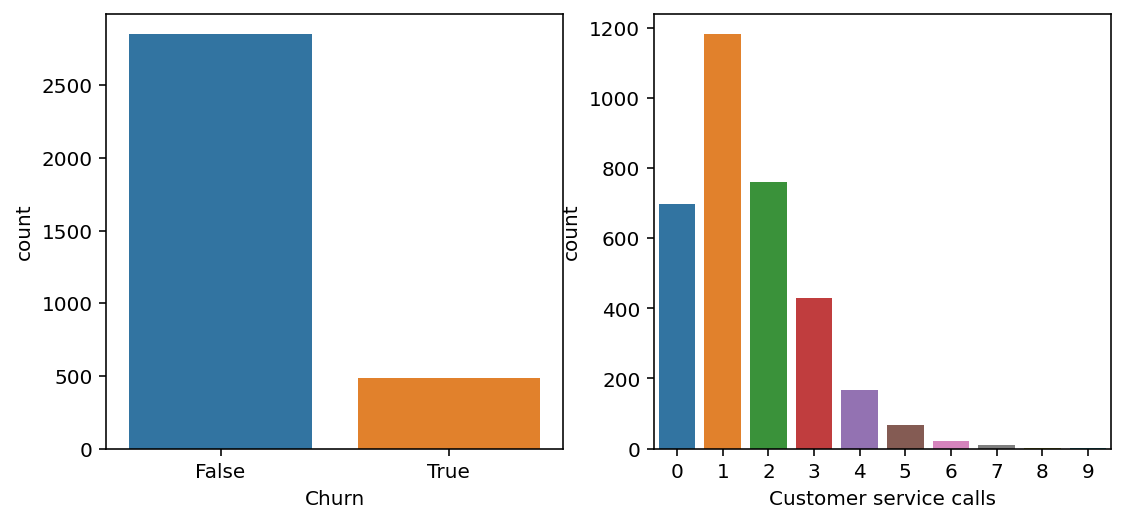

In [50]:
_, axes = plt.subplots(nrows=1,ncols=2,figsize=(9,4))

sns.countplot(x="Churn",data=df,ax=axes[0])
sns.countplot(x='Customer service calls',data=df,ax=axes[1])

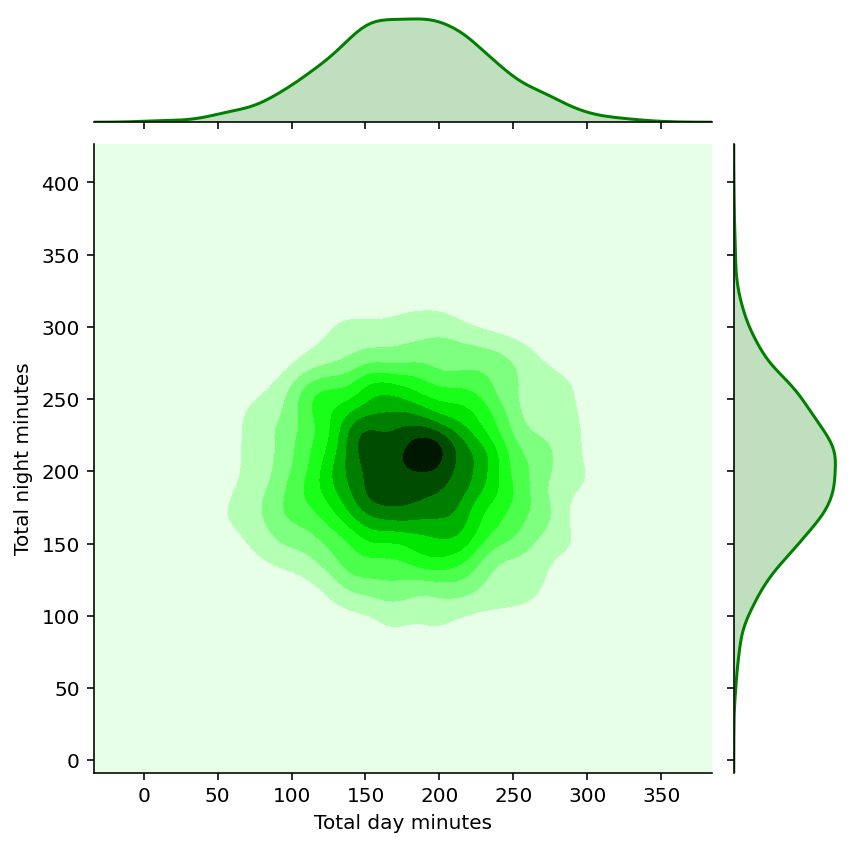

In [45]:
sns.jointplot('Total day minutes', 'Total night minutes',data=df,kind="kde",color="g")

### 4.2 Dimensionality reduction
* Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

* To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

* One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

* There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is t-SNE.

In [51]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [52]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Now, let's build a t-SNE representation:
tsne = TSNE(random_state=42)
tsne_repr = tsne.fit_transform(X_scaled)


In [ ]:
# and plot

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']

df_train = {}
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                         'repulsive', 'repulsive', 'handsome'] 
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                                   'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                                  'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_test = {}
df_test['Looks'] = ['handsome', 'handsome', 'repulsive'] 
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test = create_df(df_test, features)
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)


In [19]:
# 1. What is the entropy  S0  of the initial system? By system states, we mean values of the binary feature "Will_go" - 0 or 1 - two states in total.
trees = DecisionTreeClassifier(criterion="entropy",min_samples_split=20,random_state=42)
trees.fit(df_train,y)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=42)

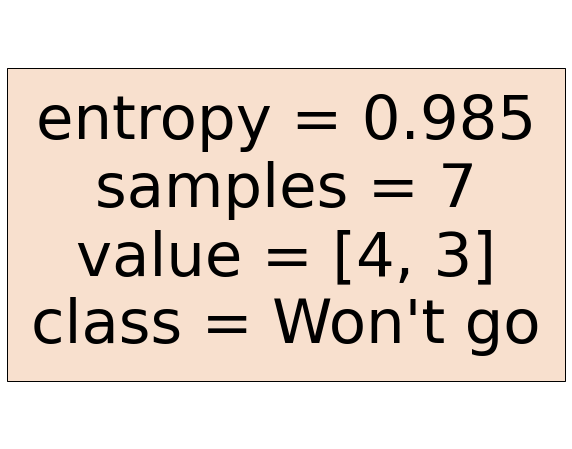

In [20]:
from sklearn import tree
predictors = df_train.columns.tolist()
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(trees,feature_names=predictors,
                   class_names=["Won't go", "Will go"],filled=True )


### Decision tree mlcourse.ai

In [58]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Adults_Census_dataset\adult.data"
columns = columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data_train = pd.read_csv(url,header=None,names=columns)


In [59]:
url2 = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Adults_Census_dataset\adult.test"
columns2 = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data_test = pd.read_csv(url2,header=None,names=columns)
data_test.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [60]:
# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[(data_test['income'] == ' >50K.') | (data_test['income']==' <=50K.')]

# encode target variable as integer
data_train.loc[data_train['income']==' <=50K', 'income'] = 0
data_train.loc[data_train['income']==' >50K', 'income'] = 1

data_test.loc[data_test['income']==' <=50K.', 'income'] = 0
data_test.loc[data_test['income']==' >50K.', 'income'] = 1

In [61]:
data_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workclass,16281,9,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281,NaN,NaN,NaN,189436,105715,13492,116736,177831,238384,1.4904e+06
education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,16281,NaN,NaN,NaN,10.0729,2.56755,1,9,10,12,16
marital-status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,16281,15,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data_test["income"].value_counts(normalize=True)

0    0.763774
1    0.236226
Name: income, dtype: float64

In [63]:
data_test['age'] = data_test['age'].astype(int)
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['education-num'] = data_test['education-num'].astype(int)
data_test['capital-gain'] = data_test['capital-gain'].astype(int)
data_test['capital-loss'] = data_test['capital-loss'].astype(int)
data_test['hours-per-week'] = data_test['hours-per-week'].astype(int)

In [70]:
data_train['income'] = data_train['income'].astype(int)
data_test['income'] = data_test['income'].astype(int)

In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16282 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [65]:
# hacemos dummies
categorical = [c for c in df_train.columns if data_train[c].dtype.name == "object"]

### andrew g Microchips clasificacion

In [2]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/microchip_tests.txt"
df = pd.read_csv(url, header=None,names=("test1","test2","released"))
df.head(3)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020586CC75E0>,
      dtype=object)

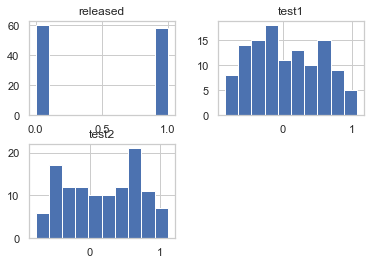

In [3]:
df.hist()

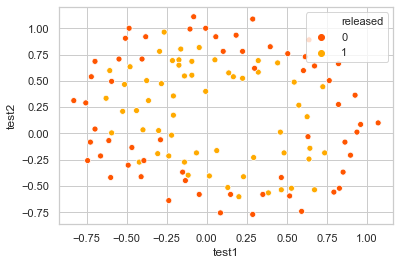

In [7]:
sns.scatterplot(x="test1",y="test2",hue="released",data=df,palette="autumn",sizes=0.9)

In [9]:
from sklearn.model_selection import cross_val_score
X=df[["test1","test2"]]
Y=df["released"]
scores = cross_val_score(LogisticRegression(),X,Y,scoring="accuracy",cv=10)

In [11]:
scores.mean()

0.22045454545454546

In [12]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor(min_samples_split=10,min_samples_leaf=10,random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf,X,Y,cv=10)

In [21]:
scores.mean()

0.662878787878788

In [28]:
from sklearn.preprocessing import PolynomialFeatures
for d in list(range(1,8)):
    X_pol =PolynomialFeatures(degree=d).fit_transform(X)
    scores = cross_val_score(LogisticRegression(),X_pol,Y,scoring="accuracy",cv=10)
    print(f"numero degree:{d}, score:{scores.mean()}")



numero degree:1, score:0.22045454545454546
numero degree:2, score:0.6696969696969697
numero degree:3, score:0.6522727272727272
numero degree:4, score:0.7204545454545455
numero degree:5, score:0.7121212121212122
numero degree:6, score:0.7128787878787879
numero degree:7, score:0.7128787878787879


In [30]:
from sklearn.preprocessing import PolynomialFeatures
for d in list(range(1,8)):
    X_pol =PolynomialFeatures(degree=d).fit_transform(X)
    scores = cross_val_score(clf,X_pol,Y,scoring="accuracy",cv=10)
    print(f"numero degree:{d}, score:{scores.mean()}")

numero degree:1, score:0.7037878787878789
numero degree:2, score:0.6272727272727272
numero degree:3, score:0.5757575757575758
numero degree:4, score:0.5848484848484847
numero degree:5, score:0.593939393939394
numero degree:6, score:0.5765151515151515
numero degree:7, score:0.5931818181818181


In [34]:
from sklearn.model_selection import GridSearchCV
X_pol =PolynomialFeatures(degree=6).fit_transform(X)
parameters = {"C":[0.01,0.04,0.06,0.08,1]}
model = LogisticRegression()
clf = GridSearchCV(model,parameters,cv=10)
clf.fit(X_pol,Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.04, 0.06, 0.08, 1]})

In [35]:
clf.best_params_

{'C': 1}

In [44]:
modelo = LogisticRegression(C=1,random_state=0)
modelo.fit(X_pol,Y)


LogisticRegression(C=1, random_state=0)

In [45]:
print(modelo.score(X_pol,Y))

0.8305084745762712


In [50]:
scores = cross_val_score(LogisticRegression(C=1,random_state=0),X_pol,Y,scoring="accuracy",cv=10)

In [51]:
scores.mean()

0.7128787878787879

### imdb

In [53]:
url_train = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\IDMB\Train.csv"
url_test = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\IDMB\Test.csv"

In [54]:
train = pd.read_csv(url_train)
train.head(3)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0


In [55]:
test = pd.read_csv(url_test)

In [77]:
text_train = train["text"] 
y_train = train["label"]
text_test = test["text"]
y_test = test["label"]

In [57]:
text_train[1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

In [58]:
#bad review
y_train[1]

0

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn.pipeline import make_pipeline

In [78]:
# omitimos una serie de pasos en procesamiento de texto, vamos directamente al modelo
text_pipe = make_pipeline(CountVectorizer(),LogisticRegression(solver="lbfgs",n_jobs=1,                         random_state=7))
text_pipe.fit(text_train,y_train)
print(text_pipe.score(text_train,y_train))

0.957725


In [86]:
word_coef = text_pipe.named_steps['logisticregression'].coef_

In [83]:
text_pipe.named_steps

{'countvectorizer': CountVectorizer(),
 'logisticregression': LogisticRegression(n_jobs=1, random_state=7)}

In [87]:
word_word = text_pipe.named_steps['countvectorizer'].get_feature_names()

In [121]:
w_coef = word_coef.flatten()

In [122]:
df = pd.DataFrame(data=[w_coef,word_word])

In [126]:
df.T.sort_values(by=0,ascending=True).head(25)

,0,1
89550,-2.91944,waste
23180,-2.20483,disappointment
63271,-1.98927,poorly
91403,-1.9782,worst
29130,-1.86665,fails
46649,-1.78646,lame
6560,-1.70829,awful
6490,-1.69739,avoid
52108,-1.6911,mediocre
25248,-1.67789,dull


### Metrics


### Clasficacion
Accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

In [4]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pd.read_csv(url,names=names)
array = dataframe.values
X=array[:,:8]
y=array[:,8]

kfold = model_selection.KFold(n_splits=10,random_state=0,shuffle=True)
model = LogisticRegression(solver="liblinear")
scoring = "accuracy"
results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring=scoring)

print(f"accuracy: {results.mean(), results.std()}")

accuracy: (0.7681818181818182, 0.03744043706339089)


In [5]:
dataframe.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Text(0.5, 1.0, 'target balanced')

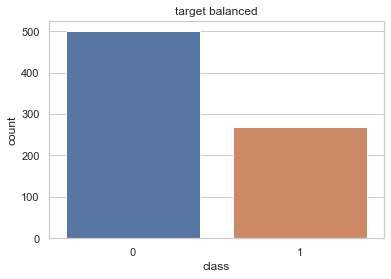

In [6]:
sns.countplot(x="class",data=dataframe)
plt.title("target balanced")

2. Log Loss

Logistic loss (or log loss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

In [8]:
scoring = "neg_log_loss"  #As mentioned above, the measure is inverted to be ascending when using the cross_val_score() function
kfold = model_selection.KFold(n_splits=10,random_state=0,shuffle=True)
model = LogisticRegression(solver="liblinear")
results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring=scoring)
#Smaller log loss is better with 0 representing a perfect log loss.
print(f"accuracy: {results.mean(), results.std()}") 

accuracy: (-0.4899905634682883, 0.038452663864071764)


3. Area Under ROC Curve

Area Under ROC Curve (or ROC AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [9]:
scoring = "roc_auc"  #As mentioned above, the measure is inverted to be ascending when using the cross_val_score() function
kfold = model_selection.KFold(n_splits=10,random_state=0,shuffle=True)
model = LogisticRegression(solver="liblinear")
results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring=scoring)
#Smaller log loss is better with 0 representing a perfect log loss.
print("You can see the the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions.")
print(f"accuracy: {results.mean(), results.std()}") 

You can see the the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions.
accuracy: (0.8277070729373135, 0.03181226272432003)


4. Confusion Matrix

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.

For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction=0 and actual=0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual=1. And so on.

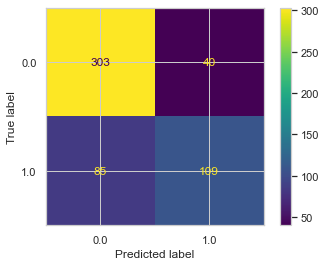

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model,X_train,y_train)test_size = 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=0)
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)


In [13]:
from sklearn.metrics import confusion_matrix
predicted = model.predict(X_train)
matrix = confusion_matrix(y_train,predicted)
print(matrix)

[[303  40]
 [ 85 109]]


In [23]:
# las suma de los positivos(tanto true como fasle) es la accuracy
print((matrix[0,0] + matrix[1,1]) / len(X_train))

0.7672253258845437


5. Classification Report

Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The classification_report() function displays the precision, recall, f1-score and support for each class.

In [24]:
from sklearn.metrics import classification_report
test_size = 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=0)
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)
predicted = model.predict(X_train)
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       343
         1.0       0.73      0.56      0.64       194

    accuracy                           0.77       537
   macro avg       0.76      0.72      0.73       537
weighted avg       0.76      0.77      0.76       537



### Regression Metrics

In this section will review 3 of the most common metrics for evaluating predictions on regression machine learning problems:

* Mean Absolute Error.
* Mean Squared Error.
* R^2.

In [2]:
import re
def normalizewords(text):
    return re.compile(r"\W+",re.UNICODE).split(text.lower())

In [3]:
text= "la vida fue *miserable + en terminos-"

In [4]:
normalizewords(text)

['la', 'vida', 'fue', 'miserable', 'en', 'terminos', '']

### Cohort Analysis in Python with Pandas